<a href="https://colab.research.google.com/github/XaviCarrera/Test/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv('/content/drive/MyDrive/crypto_drakken/sampo/pocs/v0/data/BTC-Daily.csv')
df.sort_values(by='date', inplace=True)

df.head()

unix                 date   symbol    open    high     low  \
2650  1417132800  2014-11-28 00:00:00  BTC/USD  363.59  381.34  360.57   
2649  1417219200  2014-11-29 00:00:00  BTC/USD  376.42  386.60  372.25   
2648  1417305600  2014-11-30 00:00:00  BTC/USD  376.57  381.99  373.32   
2647  1417392000  2014-12-01 00:00:00  BTC/USD  376.40  382.31  373.03   
2646  1417478400  2014-12-02 00:00:00  BTC/USD  378.39  382.86  375.23   

       close  Volume BTC  Volume USD  
2650  376.28  3220878.18     8617.15  
2649  376.72  2746157.05     7245.19  
2648  373.34  1145566.61     3046.33  
2647  378.39  2520662.37     6660.56  
2646  379.25  2593576.46     6832.53

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 2650 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 207.1+ KB


In [5]:
df.describe()

unix          open          high           low         close  \
count  2.651000e+03   2651.000000   2651.000000   2651.000000   2651.000000   
mean   1.531613e+09  11693.189332  12038.562912  11296.539461  11709.326213   
std    6.613247e+07  16272.554746  16739.237000  15718.297511  16282.908704   
min    1.417133e+09    162.000000    212.840000    152.400000    162.000000   
25%    1.474373e+09    654.680000    664.460000    640.050000    654.370000   
50%    1.531613e+09   6408.950000   6540.000000   6312.000000   6407.770000   
75%    1.588853e+09  10708.620000  10956.240000  10303.755000  10726.425000   
max    1.646093e+09  67547.490000  69000.000000  66250.000000  67559.000000   

         Volume BTC    Volume USD  
count  2.651000e+03  2.651000e+03  
mean   1.330041e+07  6.099369e+07  
std    4.715366e+07  1.072838e+08  
min    0.000000e+00  0.000000e+00  
25%    5.357883e+03  9.516170e+03  
50%    1.503310e+04  2.288982e+07  
75%    3.435336e+06  8.018383e+07  
max    7.723295e+08  1.446125e+09

In [6]:
df['date'].min()

'2014-11-28 00:00:00'

In [7]:
df['date'].max()

'2022-03-01 00:00:00'

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head()

unix   symbol    open    high     low   close  Volume BTC  \
date                                                                          
2014-11-28  1417132800  BTC/USD  363.59  381.34  360.57  376.28  3220878.18   
2014-11-29  1417219200  BTC/USD  376.42  386.60  372.25  376.72  2746157.05   
2014-11-30  1417305600  BTC/USD  376.57  381.99  373.32  373.34  1145566.61   
2014-12-01  1417392000  BTC/USD  376.40  382.31  373.03  378.39  2520662.37   
2014-12-02  1417478400  BTC/USD  378.39  382.86  375.23  379.25  2593576.46   

            Volume USD  
date                    
2014-11-28     8617.15  
2014-11-29     7245.19  
2014-11-30     3046.33  
2014-12-01     6660.56  
2014-12-02     6832.53

In [9]:
resampled = df.resample('D').asfreq()
missing_dates = resampled[resampled.isnull().any(axis=1)].index

if missing_dates.empty:
    print("No missing dates")
else:
    print(f"Missing dates: {missing_dates}")

No missing dates


In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['high'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=df.index, y=df['low'], mode='lines', name='Low'))

fig.update_layout(
    title='Bitcoin Timeseries',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig.show()

# Análisis Estadístico

## Medias Móviles

In [11]:
df['SMA_3'] = df['close'].rolling(window=21).mean()
df['EMA_3'] = df['close'].ewm(span=21, adjust=False).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_3'], mode='lines', name='SMA 21 Days'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_3'], mode='lines', name='EMA 21 Days'))

fig.update_layout(
    title='Bitcoin Price with Rolling Averages',
    xaxis_title='Date',
    yaxis_title='Close Price',
)

fig.show()

## Volatility

In [12]:
df['daily_return'] = df['close'].pct_change().dropna()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['daily_return'], mode='lines', name='Daily Perc. Return'))

fig.update_layout(
    title='Bitcoin Daily Perc. Return',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Perc. Return')
)

fig.show()

In [13]:
df['daily_return'].describe()

count    2650.000000
mean        0.002593
std         0.039853
min        -0.389801
25%        -0.012726
50%         0.001729
75%         0.018612
max         0.288951
Name: daily_return, dtype: float64

In [14]:
fig = px.histogram(df, x='daily_return', title='Daily Returns Distribution')

fig.show()

In [15]:
daily_volatility = df['daily_return'].std()
annual_volatility = daily_volatility * (365 ** 0.5)

df['rolling_volatility_30'] = df['daily_return'].rolling(window=30).std()
df['rolling_volatility_60'] = df['daily_return'].rolling(window=60).std()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['rolling_volatility_30'], mode='lines', name='Rolling Volatility - 30 days'))
fig.add_trace(go.Scatter(x=df.index, y=df['rolling_volatility_60'], mode='lines', name='Rolling Volatility - 60 days'))

fig.update_layout(
    title='Bitcoin Volatility',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Volatility')
)

fig.show()

####Niveles de volatilidad
**Alta volatilidad**: Periodos con una volatilidad elevada generalmente señalan un mayor riesgo e incertidumbre en el mercado. Podrían ser el resultado de eventos fundamentales como anuncios importantes, cambios regulatorios, etc.

**Baja volatilidad**: Una volatilidad más baja sugiere que el activo es más estable, pero también puede ser el preludio de un gran movimiento (al alza o a la baja).

####Cambios en la volatilidad
**Incrementos en la volatilidad**: Si observas un incremento súbito en la volatilidad, podría ser una señal de que los inversores están inciertos sobre las direcciones futuras del precio y están dispuestos a comprar o vender a precios significativamente diferentes.

**Disminuciones en la volatilidad**: Una disminución podría indicar que el mercado está en un estado más estable, pero ten cuidado: períodos prolongados de baja volatilidad a menudo preceden a movimientos significativos en los precios.

####Volatilidad a corto vs. largo plazo
Si estás trazando múltiples medidas de volatilidad (por ejemplo, volatilidad de 30 días y de 60 días), las diferencias entre ellas pueden ser reveladoras.

**Convergencia**: Si la volatilidad a corto plazo se acerca a la volatilidad a largo plazo, podría sugerir que las recientes fluctuaciones del precio están volviéndose más típicas.

**Divergencia**: Si la volatilidad a corto plazo se aleja de la volatilidad a largo plazo, podría indicar que el activo está experimentando movimientos de precio que son atípicos en comparación con su comportamiento a largo plazo.

#### Volatilidad y dirección del mercado

La volatilidad por sí sola no te dice si un activo está en una tendencia alcista o bajista, pero a menudo verás picos de volatilidad durante los cambios de tendencia. Si combinas la gráfica de volatilidad con otras métricas (como las medias móviles del precio), podrías obtener una visión más completa.

#### Indicador para otras estrategias

Una alta volatilidad podría indicar una oportunidad para estrategias de trading de corto plazo, mientras que una baja volatilidad podría ser más adecuada para estrategias de inversión a largo plazo.

Recuerda siempre que una mayor volatilidad generalmente implica un mayor riesgo. Los inversores y traders deben usar múltiples tipos de análisis y considerar diversos factores antes de tomar decisiones.

# Period Returns

In [16]:
df_returns = df[['close']].copy()

for i in range(2, 31):  # De 2 a 30 días
    col_name = f'return_{i}_days'
    df_returns[col_name] = df['close'].pct_change(i)

df_returns.tail()

close  return_2_days  return_3_days  return_4_days  \
date                                                                
2022-02-25  39231.64       0.052515       0.025129       0.058124   
2022-02-26  39146.66       0.020058       0.050235       0.022909   
2022-02-27  37712.68      -0.038718      -0.017307       0.011764   
2022-02-28  43178.98       0.103005       0.100616       0.125130   
2022-03-01  43185.48       0.145118       0.103172       0.100782   

            return_5_days  return_6_days  return_7_days  return_8_days  \
date                                                                     
2022-02-25       0.022352      -0.021875      -0.019135      -0.032658   
2022-02-26       0.055832       0.020138      -0.023994      -0.021260   
2022-02-27      -0.014561       0.017156      -0.017231      -0.059746   
2022-02-28       0.158415       0.128274       0.164588       0.125217   
2022-03-01       0.125299       0.158590       0.128444       0.164764   

            return_9_days  return_10_days  ...  return_21_days  \
date                                       ...                   
2022-02-25      -0.106371       -0.120021  ...       -0.056468   
2022-02-26      -0.034753       -0.108307  ...       -0.055061   
2022-02-27      -0.057112       -0.070111  ...       -0.110974   
2022-02-28       0.076540        0.079556  ...       -0.015730   
2022-03-01       0.125387        0.076702  ...       -0.020550   

            return_22_days  return_23_days  return_24_days  return_25_days  \
date                                                                         
2022-02-25        0.051220        0.062511        0.012873        0.019218   
2022-02-26       -0.058512        0.048943        0.060210        0.010679   
2022-02-27       -0.089675       -0.093000        0.010519        0.021373   
2022-02-28        0.017886        0.042273        0.038466        0.156990   
2022-03-01       -0.015582        0.018040        0.042430        0.038623   

            return_26_days  return_27_days  return_28_days  return_29_days  \
date                                                                         
2022-02-25        0.033995        0.027204        0.039294        0.054377   
2022-02-26        0.017010        0.031755        0.024979        0.037043   
2022-02-27       -0.026343       -0.020244       -0.006039       -0.012567   
2022-02-28        0.169417        0.114784        0.121767        0.138031   
2022-03-01        0.157164        0.169593        0.114952        0.121936   

            return_30_days  
date                        
2022-02-25        0.065228  
2022-02-26        0.052093  
2022-02-27       -0.000945  
2022-02-28        0.130557  
2022-03-01        0.138203  

[5 rows x 30 columns]

In [17]:
df_returns.describe().T

count          mean           std         min         25%  \
close           2651.0  11709.326213  16282.908704  162.000000  654.370000   
return_2_days   2649.0      0.005107      0.054869   -0.395883   -0.018566   
return_3_days   2648.0      0.007602      0.067071   -0.414740   -0.024883   
return_4_days   2647.0      0.010139      0.077998   -0.414740   -0.028135   
return_5_days   2646.0      0.012695      0.087640   -0.455621   -0.032891   
return_6_days   2645.0      0.015286      0.096890   -0.471075   -0.035827   
return_7_days   2644.0      0.017937      0.106007   -0.465991   -0.038600   
return_8_days   2643.0      0.020575      0.114300   -0.446874   -0.040401   
return_9_days   2642.0      0.023179      0.121889   -0.447011   -0.041880   
return_10_days  2641.0      0.025790      0.129125   -0.457050   -0.046754   
return_11_days  2640.0      0.028521      0.136662   -0.444842   -0.050286   
return_12_days  2639.0      0.031312      0.144496   -0.488168   -0.051533   
return_13_days  2638.0      0.034101      0.151893   -0.487844   -0.054350   
return_14_days  2637.0      0.036920      0.158904   -0.492561   -0.056161   
return_15_days  2636.0      0.039775      0.165905   -0.480669   -0.059498   
return_16_days  2635.0      0.042641      0.172758   -0.485355   -0.065966   
return_17_days  2634.0      0.045519      0.179514   -0.498407   -0.064272   
return_18_days  2633.0      0.048473      0.186486   -0.514143   -0.068086   
return_19_days  2632.0      0.051489      0.193538   -0.510397   -0.073911   
return_20_days  2631.0      0.054551      0.200483   -0.500660   -0.075064   
return_21_days  2630.0      0.057680      0.207477   -0.497113   -0.075787   
return_22_days  2629.0      0.060779      0.214338   -0.517124   -0.076409   
return_23_days  2628.0      0.063862      0.221085   -0.524635   -0.074620   
return_24_days  2627.0      0.066927      0.227703   -0.501193   -0.075355   
return_25_days  2626.0      0.069982      0.234040   -0.511578   -0.079307   
return_26_days  2625.0      0.073005      0.239740   -0.538330   -0.080295   
return_27_days  2624.0      0.076013      0.245268   -0.532840   -0.081149   
return_28_days  2623.0      0.079063      0.250908   -0.541715   -0.082384   
return_29_days  2622.0      0.082143      0.256618   -0.573663   -0.083818   
return_30_days  2621.0      0.085179      0.261906   -0.599160   -0.085277   

                        50%           75%           max  
close           6407.770000  10726.425000  67559.000000  
return_2_days      0.003727      0.030414      0.421597  
return_3_days      0.005791      0.041531      0.429423  
return_4_days      0.007074      0.049513      0.499262  
return_5_days      0.008589      0.057391      0.526857  
return_6_days      0.009116      0.063157      0.531301  
return_7_days      0.010095      0.069369      0.668731  
return_8_days      0.012605      0.077445      0.689621  
return_9_days      0.013260      0.083926      0.682064  
return_10_days     0.015394      0.089476      0.709917  
return_11_days     0.016422      0.096723      0.790517  
return_12_days     0.017065      0.102646      0.904107  
return_13_days     0.018029      0.107210      1.024589  
return_14_days     0.019477      0.114068      1.077856  
return_15_days     0.022339      0.119470      1.020769  
return_16_days     0.024009      0.125961      1.050589  
return_17_days     0.025771      0.132941      1.017949  
return_18_days     0.025620      0.139811      1.070707  
return_19_days     0.026922      0.145825      1.136138  
return_20_days     0.028962      0.153619      1.162868  
return_21_days     0.030308      0.157447      1.200941  
return_22_days     0.031608      0.163514      1.340204  
return_23_days     0.032382      0.169933      1.511725  
return_24_days     0.035000      0.174894      1.543993  
return_25_days     0.037630      0.183143      1.827759  
return_26_days     0.041281      0.190484      1.691483  
return_27_days     0.042093     

In [18]:
fig = go.Figure()

for col in df_returns.columns[1:]:
    fig.add_trace(go.Scatter(x=df_returns.index, y=df_returns[col], mode='lines', name=col))

fig.update_layout(title='Returns Comaprison During Different Time Periods',
                  xaxis_title='Date',
                  yaxis_title='Return',
                  xaxis=dict(showline=True, showgrid=False),
                  yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='grey'))

fig.show()

# Bollinger Bands Analysis

In [19]:
df['sma_20'] = df['close'].rolling(window=20).mean()

df['std_20'] = df['close'].rolling(window=20).std()

df['upper_band'] = df['sma_20'] + (df['std_20'] * 2)
df['lower_band'] = df['sma_20'] - (df['std_20'] * 2)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['sma_20'], mode='lines', name='SMA 20'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], mode='lines', name='Upper Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], mode='lines', name='Lower Band'))

fig.update_layout(
    title='Bollinger Bands Analysis',
    xaxis_title='Date',
    yaxis_title='Price'
)

fig.show()

###Interpretación de las Bandas
***Toques a la Banda Superior***: Cuando el precio toca o perfora la banda superior, esto puede ser una señal de que el activo está sobrecomprado. No obstante, no siempre significa que debes vender de inmediato; algunos traders utilizan esto como una señal para observar más de cerca.

***Toques a la Banda Inferior***: Similarmente, cuando el precio toca o perfora la banda inferior, podría ser una señal de que el activo está sobrevendido. De nuevo, esto no necesariamente significa que debes comprar de inmediato.

***Salidas de las Bandas (Bollinger Bounce)***: Las Bandas de Bollinger son como "elásticos", y cuando el precio sale de una banda, es común que regrese a un nivel más central. Este efecto se conoce como "Bollinger Bounce".

***Expansión y Contracción de las Bandas***: Un aumento en la distancia entre las bandas puede indicar un aumento en la volatilidad, mientras que una disminución en la distancia puede señalar una disminución en la volatilidad.

***Caminar por las Bandas:*** A veces, en una tendencia fuerte, los precios pueden "caminar" a lo largo de una de las bandas. Esto puede ser una señal de la continuación de la tendencia.

***Doble Piso y Doble Techo***: Los patrones que aparecen en las Bandas de Bollinger pueden ser similares a los patrones clásicos de análisis técnico como doble piso (W-bottoms) o doble techo (M-tops).

###Estrategias de Trading

***Estrategia de "Reversión a la Media"***: Comprar cuando el precio toca la banda inferior y vender cuando toca la banda superior, asumiendo que el precio volverá a la media.

***Estrategia de Seguimiento de Tendencia***: En una tendencia alcista confirmada, comprar cuando el precio toque la banda inferior podría considerarse una oportunidad, con la expectativa de que la tendencia continúe.

###Índice de Fuerza Relativa (RSI): Momentum

In [20]:
def calculate_rsi(data, window):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculamos el RSI con una ventana de 14 días, que es el valor más comúnmente utilizado
df['RSI'] = calculate_rsi(df, window=14)

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close Price'))

fig.update_layout(
    title='Precio de Cierre y RSI',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre',
    xaxis_rangeslider_visible=False
)

fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=df.index, y=df['RSI'], mode='lines', name='RSI'))

fig_rsi.add_shape(type='line', line=dict(dash='dash'), x0=df.index.min(), x1=df.index.max(), y0=70, y1=70)
fig_rsi.add_shape(type='line', line=dict(dash='dash'), x0=df.index.min(), x1=df.index.max(), y0=30, y1=30)

fig_rsi.update_layout(
    title='Relative Force Index',
    xaxis_title='Date',
    yaxis_title='RSI',
    yaxis_range=[0, 100]
)

fig.show()
fig_rsi.show()

## Interpretación del Índice de Fuerza Relativa (RSI

###Niveles de Sobrecompra y Sobrevenda

***Sobrecompra***: Cuando el RSI supera el nivel de 70, se considera que el activo está sobrecomprado. Esto podría sugerir que el activo está valorado en exceso y podría experimentar una corrección o al menos una pausa en el aumento del precio.

***Sobrevenda***: Cuando el RSI cae por debajo del nivel de 30, se considera que el activo está sobrevendido. Esto podría indicar que hay un exceso de pesimismo en el precio del activo, lo que podría seguirse de un rebote al alza.

###Divergencias

***Divergencia Alcista***: Si el precio del activo está haciendo mínimos más bajos, pero el RSI está haciendo mínimos más altos, esto podría indicar una posible reversión al alza en el precio.

***Divergencia Bajista***: Si el precio del activo está haciendo máximos más altos, pero el RSI está haciendo máximos más bajos, esto podría sugerir una posible reversión a la baja en el precio.

###Cruces de Media Móvil
Algunos traders usan una media móvil del RSI y comercian basados en cruces. Por ejemplo, cuando el RSI cruza por encima de su media móvil, podría considerarse una señal de compra, y viceversa.

###Patrones Gráficos
Al igual que los precios, el RSI también puede formar patrones gráficos, como triángulos, banderas y dobles techos o suelos, que podrían usarse para prever futuros movimientos en el precio del activo.

###Uso Combinado con Otros Indicadores
El RSI se utiliza a menudo en combinación con otros indicadores para validar señales de trading. Por ejemplo, una señal de sobrecompra por el RSI podría confirmarse si una media móvil a largo plazo también indica que el activo está sobrecomprado.

###Consideraciones Importantes
***Falsas Señales***: El RSI puede producir falsas señales, especialmente en mercados volátiles como las criptomonedas. Siempre es bueno utilizar el RSI en combinación con otros indicadores y técnicas.

***Configuración del RSI***: El periodo estándar para el RSI es de 14 días, pero esto puede ajustarse para hacer el indicador más o menos sensible.

***Contexto del Mercado***: Es crucial tener en cuenta el contexto del mercado más amplio. Un RSI sobrevendido en un mercado bajista podría no ser una señal de compra tan fuerte como en un mercado alcista.

***Gestión de Riesgos***: Utilizar el RSI como parte de una estrategia más amplia de gestión de riesgos, que puede incluir el uso de stops y la diversificación de la cartera.




In [22]:
df.head()

unix   symbol    open    high     low   close  Volume BTC  \
date                                                                          
2014-11-28  1417132800  BTC/USD  363.59  381.34  360.57  376.28  3220878.18   
2014-11-29  1417219200  BTC/USD  376.42  386.60  372.25  376.72  2746157.05   
2014-11-30  1417305600  BTC/USD  376.57  381.99  373.32  373.34  1145566.61   
2014-12-01  1417392000  BTC/USD  376.40  382.31  373.03  378.39  2520662.37   
2014-12-02  1417478400  BTC/USD  378.39  382.86  375.23  379.25  2593576.46   

            Volume USD  SMA_3       EMA_3  daily_return  \
date                                                      
2014-11-28     8617.15    NaN  376.280000           NaN   
2014-11-29     7245.19    NaN  376.320000      0.001169   
2014-11-30     3046.33    NaN  376.049091     -0.008972   
2014-12-01     6660.56    NaN  376.261901      0.013527   
2014-12-02     6832.53    NaN  376.533546      0.002273   

            rolling_volatility_30  rolling_volatility_60  sma_20  std_20  \
date                                                                       
2014-11-28                    NaN                    NaN     NaN     NaN   
2014-11-29                    NaN                    NaN     NaN     NaN   
2014-11-30                    NaN                    NaN     NaN     NaN   
2014-12-01                    NaN                    NaN     NaN     NaN   
2014-12-02                    NaN                    NaN     NaN     NaN   

            upper_band  lower_band         RSI  
date                                            
2014-11-28         NaN         NaN         NaN  
2014-11-29         NaN         NaN  100.000000  
2014-11-30         NaN         NaN   11.518325  
2014-12-01         NaN         NaN   61.894025  
2014-12-02         NaN         NaN   65.262076

In [23]:
df.isnull().mean()

unix                     0.000000
symbol                   0.000000
open                     0.000000
high                     0.000000
low                      0.000000
close                    0.000000
Volume BTC               0.000000
Volume USD               0.000000
SMA_3                    0.007544
EMA_3                    0.000000
daily_return             0.000377
rolling_volatility_30    0.011316
rolling_volatility_60    0.022633
sma_20                   0.007167
std_20                   0.007167
upper_band               0.007167
lower_band               0.007167
RSI                      0.000377
dtype: float64

In [24]:
df.reset_index(inplace=True)

In [25]:
# Identificar donde el RSI cruza 30 hacia arriba y 70 hacia abajo
df['cross_30_up'] = (df['RSI'] > 30) & (df['RSI'].shift(1) <= 30)
df['cross_70_down'] = (df['RSI'] < 70) & (df['RSI'].shift(1) >= 70)

# Analizar cuántas veces el precio sube después de cruzar 30 hacia arriba
cross_30_up_dates = df[df['cross_30_up']]['date']
price_increases_after_30 = (df.loc[df['date'].isin(cross_30_up_dates + pd.Timedelta(days=1)), 'close'] > df.loc[df['date'].isin(cross_30_up_dates), 'close'].values).mean()

# Lo mismo para 70 hacia abajo
cross_70_down_dates = df[df['cross_70_down']]['date']
price_decreases_after_70 = (df.loc[df['date'].isin(cross_70_down_dates + pd.Timedelta(days=1)), 'close'] < df.loc[df['date'].isin(cross_70_down_dates), 'close'].values).mean()

In [26]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['date'], y=df['RSI'], mode='lines', name='RSI'))

# Marcar donde el RSI cruza 30 hacia arriba
fig1.add_trace(go.Scatter(x=df[df['cross_30_up']]['date'], y=df[df['cross_30_up']]['RSI'], mode='markers', marker=dict(size=8, color='green'), name='RSI 30 Up'))

# Marcar donde el RSI cruza 70 hacia abajo
fig1.add_trace(go.Scatter(x=df[df['cross_70_down']]['date'], y=df[df['cross_70_down']]['RSI'], mode='markers', marker=dict(size=8, color='red'), name='RSI 70 Down'))

# Configuraciones del gráfico
fig1.update_layout(
    title='RSI and 30/70 Crossing',
    xaxis_title='Date',
    yaxis_title='RSI',
    yaxis_range=[0, 100]
)

fig1.show()

In [27]:
time_to_go_30_to_70 = []
current_start = None
for i, row in df.iterrows():
    if row['cross_30_up']:
        current_start = row['date']
    if current_start and row['cross_70_down']:
        time_to_go_30_to_70.append(row['date'] - current_start)
        current_start = None
avg_time_30_to_70 = pd.Series(time_to_go_30_to_70).mean()

avg_time_30_to_70

Timedelta('17 days 12:00:00')

In [28]:
time_to_go_30_to_70_days = [t.days for t in time_to_go_30_to_70]

fig2 = go.Figure(data=[go.Histogram(x=time_to_go_30_to_70_days)])
fig2.update_layout(
    title='Time Distribution for RSI to go from 30 to 70',
    xaxis_title='Days',
    yaxis_title='Frequency'
)

fig2.show()

In [29]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='lines', name='Close Price'))

fig3.add_trace(go.Scatter(x=df[df['cross_30_up']]['date'], y=df[df['cross_30_up']]['close'], mode='markers', marker=dict(size=8, color='green'), name='Buy'))

fig3.add_trace(go.Scatter(x=df[df['cross_70_down']]['date'], y=df[df['cross_70_down']]['close'], mode='markers', marker=dict(size=8, color='red'), name='Sell'))

fig3.update_layout(
    title='Closing Price and Optimal Timing for Selling/Buying',
    xaxis_title='Date',
    yaxis_title='Closing Price'
)

fig3.show()

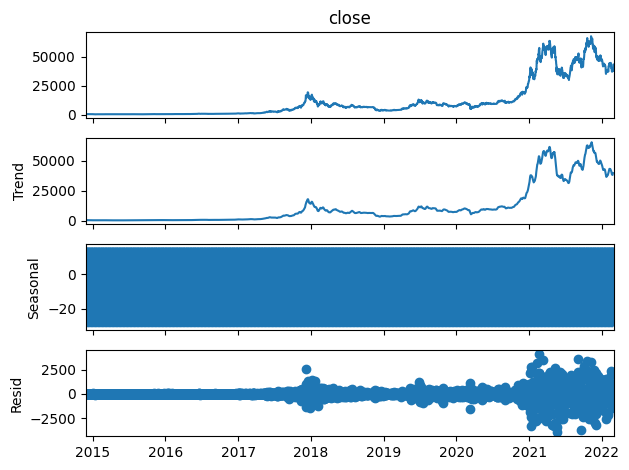

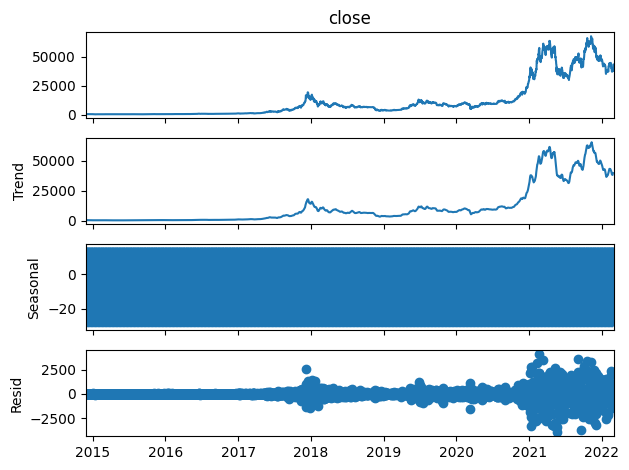

In [30]:
import statsmodels.api as sm

df.set_index('date', inplace=True)
decomposition = sm.tsa.seasonal_decompose(df['close'], model='additive')

decomposition.plot()

## Parabolic SAR (stop loss)

# Simple Linear Regression

# Time Series Analysis

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
from prophet import Prophet

In [32]:
df.head()

unix   symbol    open    high     low   close  Volume BTC  \
date                                                                          
2014-11-28  1417132800  BTC/USD  363.59  381.34  360.57  376.28  3220878.18   
2014-11-29  1417219200  BTC/USD  376.42  386.60  372.25  376.72  2746157.05   
2014-11-30  1417305600  BTC/USD  376.57  381.99  373.32  373.34  1145566.61   
2014-12-01  1417392000  BTC/USD  376.40  382.31  373.03  378.39  2520662.37   
2014-12-02  1417478400  BTC/USD  378.39  382.86  375.23  379.25  2593576.46   

            Volume USD  SMA_3       EMA_3  daily_return  \
date                                                      
2014-11-28     8617.15    NaN  376.280000           NaN   
2014-11-29     7245.19    NaN  376.320000      0.001169   
2014-11-30     3046.33    NaN  376.049091     -0.008972   
2014-12-01     6660.56    NaN  376.261901      0.013527   
2014-12-02     6832.53    NaN  376.533546      0.002273   

            rolling_volatility_30  rolling_volatility_60  sma_20  std_20  \
date                                                                       
2014-11-28                    NaN                    NaN     NaN     NaN   
2014-11-29                    NaN                    NaN     NaN     NaN   
2014-11-30                    NaN                    NaN     NaN     NaN   
2014-12-01                    NaN                    NaN     NaN     NaN   
2014-12-02                    NaN                    NaN     NaN     NaN   

            upper_band  lower_band         RSI  cross_30_up  cross_70_down  
date                                                                        
2014-11-28         NaN         NaN         NaN        False          False  
2014-11-29         NaN         NaN  100.000000        False          False  
2014-11-30         NaN         NaN   11.518325        False           True  
2014-12-01         NaN         NaN   61.894025         True          False  
2014-12-02         NaN         NaN   65.262076        False          False

In [33]:
model = df[['sma_20']]
model.reset_index(inplace=True)

model.rename(columns={'date':'ds','sma_20':'y'}, inplace=True)

model.head()

<ipython-input-33-a4cc3a58c336>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds   y
0 2014-11-28 NaN
1 2014-11-29 NaN
2 2014-11-30 NaN
3 2014-12-01 NaN
4 2014-12-02 NaN

In [34]:
train = model.iloc[:-30]
test = model.iloc[-30:]

In [35]:
def run_prophet_metrics(train, test, future_period):
    m = Prophet()
    m.fit(train)

    future = m.make_future_dataframe(periods=future_period)

    forecast = m.predict(future)

    y_pred = forecast.loc[forecast['ds'].isin(test['ds']), 'yhat']

    mape = np.mean(np.abs((test['y'].values - y_pred.values) / test['y'].values)) * 100

    r2 = r2_score(test['y'][:len(y_pred)], y_pred)

    return mape, r2, forecast

In [36]:
results = pd.DataFrame(columns=['Days', 'MAPE', 'R2'])

for days in [7, 15, 21, 30]:
    mape, r2, _ = run_prophet_metrics(train, test[:days], days)
    results = results.append({'Days': days, 'MAPE': mape, 'R2': r2}, ignore_index=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxdp9bhc/gcyq2ljj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxdp9bhc/5pvyb7_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92890', 'data', 'file=/tmp/tmpgxdp9bhc/gcyq2ljj.json', 'init=/tmp/tmpgxdp9bhc/5pvyb7_o.json', 'output', 'file=/tmp/tmpgxdp9bhc/prophet_modeljc7ly4p9/prophet_model-20230906192951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-36-65c88fddfe11>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. 

In [37]:
results

Days       MAPE           R2
0   7.0  57.969890 -3897.492093
1  15.0  58.906552 -1415.837089
2  21.0  58.103605  -442.714691
3  30.0  58.598059  -441.182756

In [38]:
def run_prophet(train, test, future_period):
    m = Prophet()
    m.fit(train)

    future = m.make_future_dataframe(periods=future_period)

    forecast = m.predict(future)

    y_pred = forecast.loc[forecast['ds'].isin(test['ds']), 'yhat']

    forecast_valid = forecast.loc[forecast['ds'].isin(test['ds'])]

    return mape, r2, forecast_valid

In [40]:
days = 30
mape, r2, forecast_valid = run_prophet(train, test[:days], days)

fig = go.Figure()

fig.add_trace(go.Scatter(x=train['ds'], y=train['y'], mode='lines', name='Real (Entrenamiento)', line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=test['ds'][:days], y=test['y'][:days], mode='lines', name='Real (Validación)'))

fig.add_trace(go.Scatter(x=forecast_valid['ds'], y=forecast_valid['yhat'], mode='lines', name='Predicción'))

fig.update_layout(title=f'Comparación entre valores reales y predicciones a {days} días',
                  xaxis_title='Fecha',
                  yaxis_title='Valor de y',
                  xaxis=dict(showline=True, showgrid=False),
                  yaxis=dict(showgrid=True))

# Mostrar el gráfico
fig.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxdp9bhc/ukopz6g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxdp9bhc/84tljvv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1708', 'data', 'file=/tmp/tmpgxdp9bhc/ukopz6g1.json', 'init=/tmp/tmpgxdp9bhc/84tljvv_.json', 'output', 'file=/tmp/tmpgxdp9bhc/prophet_modelj49h5l74/prophet_model-20230906193456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
